## 8 ions meta (130 V and 180 V)

This notebook uses the integration time threshold to compare transition rates of ions in 8 ion system. <br> 
Integration Time (dT) chosen is 30 ms. For each integration time, a range of k is plotted (k ranges from ~intersection of Poisson curves to a little over the lower tail of bright Poisson curve) and k corresponding to minimum error is chosen. 

##### About the algorithm: 
The code parses the dataframe of each ion in "steps" of length k (obtained from double poisson curve). If the total time of k photon hits is more than or equal to the integration time (dT) then we call it a "dark" state and assign it a value of "0". Otherwise we assign it a value "1" for "bright" state. The state information is contained in the "state" column of data. 

In [1]:
from scipy.stats import poisson

In [2]:
import numpy as np
import scipy
import scipy.optimize
from scipy.optimize import curve_fit
from scipy import stats
from scipy.stats import poisson
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.colors as mcolors
from mpl_toolkits import mplot3d
import glob
import time
import pandas as pd
import math
#import File_functions
plt.rcParams["figure.figsize"] = (3,3)
print (time.ctime())

Sun Mar 13 13:55:04 2022


In [3]:
def Eight(x,y,file,plot,afterpulse_control = True):
    n=8
    
    #global filename 
    Eight.filename = file
    #x,y are lists containing x and y values of ions obtained after "Pandas" analysis
    
    x1,y1=x[0],y[0];x2,y2=x[1],y[1];x3,y3=x[2],y[2];x4,y4=x[3],y[3];
    x5,y5=x[4],y[4];x6,y6=x[5],y[5];x7,y7=x[6],y[6];x8,y8=x[7],y[7]
    
    
    old_data_table = pd.read_csv(f'{filename}')
    old_data_table = old_data_table.drop(columns = 'Unnamed: 0')
    old_data_table['time'] = ((25*old_data_table['time'])/(4096)) # Conversion factor from camera time to ns

    
    
    R = 1 # radius of region of interest. Individual ions can be given different radii 


    R1 = R
    Ion_1 = (
        old_data_table
        #.query("`cluster size` > 3")
        .query(f"{x1-R1} <= x <= {x1+R1} and {y1-2*R1} <= y <= {y1+2*R1}")
        .reset_index(drop=True)
    )
    
    
    name = Ion_1
    dt = np.diff(name["time"])
    dt = np.insert(dt,0,0)           # dt of first ion hit is 0 
    Ion_1['dt'] = dt                 #Create and Save the difference in time between events in the ROI
    
    if afterpulse_control:
        Ion_1.query(f' dt > 1e-7', inplace = True) # eliminate after pulsing effects, this prevents breaks in dark states, and peaks at 0(s) bright states
        Ion_1.reset_index(inplace = True)
    Ion_1['index'] = np.arange(len(name)) # new index is used in certain functions in class: "Ion"
    
    
    ### Same for the rest of the Ions ### 
    R2 = R
    Ion_2 = (
        old_data_table
        #.query("`cluster size` > 3")
        .query(f"{x2-R2} <= x <= {x2+R2} and {y2-2*R2} <= y <= {y2+2*R2}")
        .reset_index(drop=True)
    )
    name = Ion_2
    dt = np.diff(name["time"])
    dt =np.insert(dt,0,0)
    Ion_2['dt'] = dt
    
    if afterpulse_control:
        Ion_2.query(f' dt > 1e-7', inplace = True) # eliminate after pulsing effects, this prevents breaks in dark states, and peaks at 0(s) bright states
        Ion_2.reset_index(inplace = True)
    Ion_2['index'] = np.arange(len(name))
    
    R3 = R
    Ion_3 = (
        old_data_table
        #.query("`cluster size` > 3")
        .query(f"{x3-R3} <= x <= {x3+R3} and {y3-2*R3} <= y <= {y3+2*R3}")
        .reset_index(drop=True)
    )
    name = Ion_3
    dt = np.diff(name["time"])
    dt =np.insert(dt,0,0)
    Ion_3['dt'] = dt
    
    if afterpulse_control:
        Ion_3.query(f' dt > 1e-7', inplace = True) # eliminate after pulsing effects, this prevents breaks in dark states, and peaks at 0(s) bright states
        Ion_3.reset_index(inplace = True)
    Ion_3['index'] = np.arange(len(name))
    
    R4 = R
    Ion_4 = (
        old_data_table
        #.query("`cluster size` > 3")
        .query(f"{x4-R4} <= x <= {x4+R4} and {y4-2*R4} <= y <= {y4+2*R4}")
        .reset_index(drop=True)
    )
    name = Ion_4
    dt = np.diff(name["time"])
    dt =np.insert(dt,0,0)
    Ion_4['dt'] = dt
    
    if afterpulse_control:
        Ion_4.query(f' dt > 1e-7', inplace = True) # eliminate after pulsing effects, this prevents breaks in dark states, and peaks at 0(s) bright states
        Ion_4.reset_index(inplace = True)
    Ion_4['index'] = np.arange(len(name))
    
    R5 = R
    Ion_5 = (
        old_data_table
        #.query("`cluster size` > 3")
        .query(f"{x5-R5} <= x <= {x5+R5} and {y5-2*R5} <= y <= {y5+2*R5}")
        .reset_index(drop=True)
    )
    name = Ion_5
    dt = np.diff(name["time"])
    dt =np.insert(dt,0,0)
    Ion_5['dt'] = dt
    
    if afterpulse_control:
        Ion_5.query(f' dt > 1e-7', inplace = True) 
        Ion_5.reset_index(inplace = True)
    Ion_5['index'] = np.arange(len(name))
    
    R6 = R
    Ion_6 = (
        old_data_table
        #.query("`cluster size` > 3")
        .query(f"{x6-R6} <= x <= {x6+R6} and {y6-2*R6} <= y <= {y6+2*R6}")
        .reset_index(drop=True)
    )
    name = Ion_6
    dt = np.diff(name["time"])
    dt =np.insert(dt,0,0)
    name['dt'] = dt
    
    if afterpulse_control:
        Ion_6.query(f' dt > 1e-7', inplace = True) 
        Ion_6.reset_index(inplace = True)
    Ion_6['index'] = np.arange(len(name))
    
    
    R7 = R
    Ion_7 = (
        old_data_table
        #.query("`cluster size` > 3")
        .query(f"{x7-R7} <= x <= {x7+R7} and {y7-2*R7} <= y <= {y7+2*R7}")
        .reset_index(drop=True)
    )
    name = Ion_7
    dt = np.diff(name["time"])
    dt =np.insert(dt,0,0)
    name['dt'] = dt
    
    if afterpulse_control:
        Ion_7.query(f' dt > 1e-7', inplace = True) 
        Ion_7.reset_index(inplace = True)
    Ion_7['index'] = np.arange(len(name))
    

    R8 = R
    Ion_8 = (
        old_data_table
        #.query("`cluster size` > 3")
        .query(f"{x8-R8} <= x <= {x8+R8} and {y8-2*R8} <= y <= {y8+2*R8}")
        .reset_index(drop=True)
    )
    name = Ion_8
    dt = np.diff(name["time"])
    dt =np.insert(dt,0,0)
    name['dt'] = dt
    
    if afterpulse_control:
        Ion_8.query(f' dt > 1e-7', inplace = True) 
        Ion_8.reset_index(inplace = True)
    Ion_8['index'] = np.arange(len(name))
    
    
    # Creates a data set to call in the actual analysis Notebook
    
    
    data_table = Ion_1
    data_table = data_table.append(Ion_2)
    data_table = data_table.append(Ion_3)
    data_table = data_table.append(Ion_4)
    data_table = data_table.append(Ion_5)
    data_table = data_table.append(Ion_6)
    data_table = data_table.append(Ion_7)
    data_table = data_table.append(Ion_8)
    Eight.data_table=data_table
     
        
    #Define the different ions with the given functions associated  with the class: "Ion"
    
    
    Eight.ion_1 = Ion(1, x1, y1, R1, Ion_1)
    Eight.ion_2 = Ion(2, x2, y2, R2, Ion_2)
    Eight.ion_3 = Ion(3, x3, y3, R3, Ion_3)
    Eight.ion_4 = Ion(4, x4, y4, R4, Ion_4)
    Eight.ion_5 = Ion(5, x5, y5, R5, Ion_5)
    Eight.ion_6 = Ion(6, x6, y6, R6, Ion_6)
    Eight.ion_7 = Ion(7, x7, y7, R7, Ion_7)
    Eight.ion_8 = Ion(8, x8, y8, R8, Ion_8)
    
    
    if plot==True:
        fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 4))
        ax1.hist2d(old_data_table['x'], old_data_table['y'], range = [(min(data_table['x'])-2, max(data_table['x'])+2), (min(data_table['y'])-2, max(data_table['y'])+2)], bins = (int(max(data_table['x']) - min(data_table['x']) +5) , int(max(data_table['y']) - min(data_table['y']) +5)))
        ax2.hist2d(data_table['x'], data_table['y'], range = [(min(data_table['x'])-2, max(data_table['x'])+2), (min(data_table['y'])-2, max(data_table['y'])+2)], bins = (int(max(data_table['x']) - min(data_table['x']) +5) , int(max(data_table['y']) - min(data_table['y']) +5)))
      
        ax1.set_title("Full Data")
        ax2.set_title("True Ion ROI")
        
        plt.show()

In [4]:
class Ion:
    def __init__(self, n, x,y,r0,data,debugPrinting=False):
        self.filename=Eight.filename
        self.n = n # Ion number (left to right)
        self.x = x # Ion x-position
        self.y = y # Ion y-position
        self.r0 = r0 # Ion radius
        
        self.data = data # Dataframe used (data_table in choose_file)
        self.threshold = [] # differentiator between bright/dark states by 'dt' between events in ROI
        self.bright = [] # stores data for only bright events
        self.dark = [] # stores data for only dark events
        self.transpts = []  # Transition points (index number)
        # DtB = dark to bright
        # BtD = bright to dark
        self.tofBright=[]  
        self.tofDark=[]
        self.dtDark=[]
        self.dtBright=[]
        self.DtB = []
        self.BtD = []
        self.brightRanges = []
        self.rate=[]        # Optimal transition rate (after error minimization)
    
    def State(self,dT,k_l,k_u,k_poiss,plot=False):   # determines state using integration 
                                                       # time dT and parameter k 
        global k_lower;global k_upper;global data
        self.dT=dT
        k_lower,k_upper=k_l,k_u
        
        rate_dT=[]                                #list of rate for all k within bounds 
        self.name=ion_1
        print (f"Ion_{self.n}\nPoisson Intersection:{k_poiss}")
        for j in range (k_lower,k_upper):         # lower and upper limit from "ranges" dictionary
            print (f"At k={j}:")
            data=self.data
            steps=j                                           # max dark photons in dT
            state=[]
            for i in range(min(data.index),max(data.index)+1,steps): # if k+1 or more photons in dT 
                                                                       #=> bright state
                if (i+steps-1)<len(data):
                    if (data["time"][i+steps-1]-data["time"][i])<dT: # bright state
                        state.extend(([1]*steps))
                    else: state.extend(([0]*steps))
                else:
                    hits=len(data[i:]) #number of hits/events left in dataframe
                    max_dT=dT/(steps+1) #max mean time difference between two hits in bright state
                    if (max(data["time"])-data["time"][i])>(max_dT*hits):
                        state.extend(([0]*len(data[i:])))
                    else: state.extend(([1]*len(data[i:])))
            
            self.data["state"]=state
            self.bright=data[data["state"]==1]
            self.dark=data[data["state"]==0]

            self.transitions()                                        # gives rate and transpts 
            
            self.hline_BtD=np.array((data.iloc[self.BtD]["time"])*1e-9)    #transition lines for the plot
            self.hline_DtB=np.array((data.iloc[self.DtB]["time"])*1e-9)
            
            if k_upper-k_lower>1:           #appends rate for each "k" in an array
                                                # not executed when called through "min_error_k" func
                    rate_dT.append(self.rate)
            print ("Transitions", len(self.transpts), "Rate:",self.rate)

        # plotting
            if plot==True:
                fig,(ax,ax1,ax2)=plt.subplots(3,1,figsize=(20,10))
                ax.set_title(f"Max Dark={j}") 
                ax.hist2d((data["time"]*1e-9),data["x"],bins=(400,3),cmap="YlGnBu")
                ax.set_ylabel("Position")

    
                ymin,ymax=name.x-name.r0,name.x+name.r0                #ROI of ion     

                ax1.hist2d((data["time"][:10000]*1e-9),data["x"][:10000],bins=(400,3),cmap="YlGnBu")
                ax1.vlines(self.hline_BtD,ymin,ymax,color="b",lw=0.8,ls="--",label="Transpt BtD")
                ax1.vlines(self.hline_DtB,ymin,ymax,color="r",lw=0.8,ls="--",label="Transpt DtB")
                ax1.set_ylabel("Position")
                ax1.legend()

                ax2.hist2d((data["time"][:10000]*1e-9),data["x"][:10000],bins=(400,3),cmap="YlGnBu")
                ax2.set_ylabel("Position")
                ax2.set_xlabel("Time (s)")
                

                plt.show()

        if k_upper-k_lower>1:       #returns lists of rates and errors for each ion at each k
                                                #not executed when called through "min_error_k"
                rate_dT=np.array(rate_dT)
                error_dT=self.error_transrate(rate_dT)
                return rate_dT,error_dT
        
    
    def min_error_k(self,error_dT,rate_dT,plot):  # returns "Optimal Transitions" by minimizing error 

        perror_dT=error_dT/rate_dT   # array of percent errors
        min_perror,min_perror_idx=min(perror_dT),np.argmin(perror_dT)    # minimum percent error and its index
                                                                           
        self.error=error_dT[min_perror_idx]    #final error is one with min percent error
        self.rate=rate_dT[min_perror_idx]
        self.k=np.arange(k_lower,k_upper)[min_perror_idx] # gives "k" corresponding to minimum perror
        self.State(self.dT,self.k,self.k+1,self.k_poiss,plot=False) # call "State" one final time to get Optimal Data
         
        j=self.k
        
        if plot==True:
                fig,(ax,ax1,ax2)=plt.subplots(3,1,figsize=(20,10))
                ymin,ymax=self.x-self.r0,self.x+self.r0 
                ax.set_title(f"Max Dark={j}") 
                ax.hist2d((data["time"][:10000]*1e-9),data["x"][:10000],bins=(400,3),cmap="YlGnBu")
                ax.vlines(self.hline_BtD,ymin,ymax,color="b",lw=0.8,ls="--",label="Transpt BtD")
                ax.vlines(self.hline_DtB,ymin,ymax,color="r",lw=0.8,ls="--",label="Transpt DtB")
                ax.set_ylabel("Position")
                ax.legend()

                #plotting the first 5000 events 
                               #ROI of ion     

                ax1.hist2d((data["time"][10000:20000]*1e-9),data["x"][10000:20000],bins=(400,3),cmap="YlGnBu")
                ax1.vlines(self.hline_BtD,ymin,ymax,color="b",lw=0.8,ls="--",label="Transpt BtD")
                ax1.vlines(self.hline_DtB,ymin,ymax,color="r",lw=0.8,ls="--",label="Transpt DtB")
                ax1.set_ylabel("Position")
                ax1.legend()

                ax2.hist2d((data["time"][20000:30000]*1e-9),data["x"][20000:30000],bins=(400,3),cmap="YlGnBu")
                ax2.vlines(self.hline_BtD,ymin,ymax,color="b",lw=0.8,ls="--",label="Transpt BtD")
                ax2.vlines(self.hline_DtB,ymin,ymax,color="r",lw=0.8,ls="--",label="Transpt DtB")
                ax2.set_ylabel("Position")
                ax2.set_xlabel("Time (s)")
                ax.axvline(17,c="k",lw=2)

                plt.show()
        return self.rate,self.error,self.k
            
                 
        
    def transitions(self,single_photon_control = True): #finds transition points
        #global transpts 
        global DtB; global BtD; #global rate
        # identifies points where quantum jumps happen using list comprehension
        misscount = 0
        transpts=[]
        self.transpts.clear()
        for i in range(len(self.data)) :
            if i not in self.bright['index']:
                misscount = misscount + 1
                if misscount == 1:
                    transpts.append(i)
            if i in self.bright['index'] and misscount >= 1:
                misscount = 0
                transpts.append(i)         
        self.DtB.clear()
        self.BtD.clear()
        #DtB=[]
        #BtD=[]
        for i in range(len(transpts)):
            if transpts[i] in self.bright['index']:
                self.DtB.append(transpts[i])
            else:
                self.BtD.append(transpts[i])
        rate=len(transpts)/((max(data["time"])-min(data["time"]))*1e-9)
        self.transpts=transpts
        self.rate=rate
        #self.DtB,self.BtD=DtB,BtD
        
                
    def error_transrate(self,rates): #finds methodological error due to k. 
                                #average transition rate when k is varied by +-1
        
        err=[]
        for i in range(1,len(rates)-1):       #excludes first and last elements
            diff_left=abs(rates[i]-rates[i-1])
            diff_right=abs(rates[i+1]-rates[i])
            diff=(diff_left+diff_right)/2
            err.append(diff)
        err.insert(0,abs(rates[1]-rates[0]))  #error of first entry
        err.append(abs(rates[-1]-rates[-2]))  # error of last entry     
        return np.array(err)                 #numpy array of errors in seconds
    
    def percent_error(error,rates):
        return np.array(error)/np.array(rates)
                
    def setup(self,kind,sigma, uncertainty_control, single_photon_control):
        
        if kind=="auto":
            self.auto_threshold(sigma,uncertainty_control)
            self.sortbythreshold(uncertainty_control)
            self.transitions(single_photon_control)
        elif kind=="integration":
            self.FindBrightRangesPrecise(arrT,N)
            
        elif kind=="dual":
            self.FindBrightRangesPrecise(arrT,N)
            
    def visRange(self, start, duration):
        
        # plots a small slice of data 
        # and uses red/blue color coding to distinguish between the bright and dark state
        # useful for visualizing the effects of different sorting methods
        
        end = start+duration # index values
        use = self.data.query(f'{start} <= index < {end}')
        index = use.index
        change = use['dt']
        linehere = []
        for j in index:
            if j in self.transpts:
                linehere.append(j)
        
        plt.figure(figsize=(15, 1.5))
        counting = index
        plt.scatter(counting, change)
        plt.title("Visual representation of ion states")
        plt.xlabel("Time (s)")
        plt.ylabel("time between photons (s)")
        plt.ylim(-15,25*self.threshold)

        if linehere != []:
            
            if index[0] in self.dark['index']:
                if index[0] in self.transpts:
                    plt.axvspan(self.data.at[index[0], 'index'], self.data.at[linehere[0], 'index'], alpha=0.3, color='blue')
                    plt.axvspan(start, self.data.at[index[0], 'index'], alpha=0.3, color='red',label="Bright")
                else:
                    plt.axvspan(start, self.data.at[linehere[0], 'index'], alpha=0.3, color='blue',label="Dark")
            if index[0] in self.bright['index']:
                if index[0] in self.transpts:
                    plt.axvspan(self.data.at[index[0], 'index'], self.data.at[linehere[0], 'index'], alpha=0.3, color='red')
                    plt.axvspan(start, self.data.at[index[0], 'index'], alpha=0.3, color='blue')
                else:
                    plt.axvspan(start, self.data.at[linehere[0], 'index'], alpha=0.3, color='red')

            if index[-1] in self.bright['index']:            
                plt.axvspan(self.data.at[linehere[-1], 'index'], end, alpha=0.3, color='red')
            if index[-1] in self.dark['index']:
                plt.axvspan(self.data.at[linehere[-1], 'index'], end, alpha=0.3, color='blue')
                
            for i in range(len(linehere)):
                plt.axvline(x=linehere[i])
            for i in range(len(linehere) - 1):
                if linehere[i] in self.DtB:
                    plt.axvspan(self.data.at[linehere[i], 'index'], self.data.at[linehere[i+1], 'index'], alpha=0.3, color='red')
                if linehere[i] in self.BtD:
                    plt.axvspan(self.data.at[linehere[i], 'index'], self.data.at[linehere[i+1], 'index'], alpha=0.3, color='blue')
            
            
        if linehere == []:
            if len(use) == (0 or 1):
                print(f'Ion {self.n} had {len(use)} hits during this time')
                plt.axvspan(start, end, alpha=0.3, color='blue')
            else:
                if index[0] in self.dark['index']:
                    plt.axvspan(self.data.at[index[0], 'index'], self.data.at[index[-1], 'index'], alpha=0.3, color='blue')
                else:
                    plt.axvspan(self.data.at[index[0], 'index'], self.data.at[index[-1], 'index'], alpha=0.3, color='red')
            plt.axvspan(self.data.at[index[-1], 'index'], end, alpha=0.3, color='blue')
            plt.axvspan(start, self.data.at[index[0], 'index'], alpha=0.3, color='blue')
            
        plt.xlim(start,end) 
        plt.axhline(self.threshold)
        plt.legend()
        plt.show()
 

               
#--------------
    def DeleteTooOldEvents(self, t, prevHits, currInterval):
        while (len(prevHits) > 0 and (t - prevHits[0] > self.dT)):
            if (len(prevHits) == self.N):
                assert (currInterval != None)
                lastRange = None
                if len(self.brightRanges) > 0:
                    lastRange = self.brightRanges[-1]
                if (lastRange != None and lastRange[1] >= currInterval[0]):
                    self.brightRanges.pop()
                    currInterval[0] = lastRange[0]

                currInterval[1] = prevHits[-1]
                self.brightRanges.append(currInterval)
                if self.debugPrinting:
                    print("bright ranges append %s" % currInterval)

            oldElem = prevHits.pop(0)
            if self.debugPrinting:
                print("remove %s, length %s" % (oldElem, len(prevHits)))
    def GetIntervalBegin(self, x):
        res = self.dT * (int)(x / self.dT)
        return res

    def GetCountsForEvents(self,T):
        # counts events within each integration time
        
        # build arrays xyt with just events in region
        self.dT = T    #integration time
        xi,yi = self.x,self.y
        events=self.data["time"]
      
        res = []
        l = 0
        r = 0
        while l < len(events):
            intervalStart = self.GetIntervalBegin(events[l])
            r = l + 1
            while r < len(events) and events[r] - intervalStart <= self.dT:
                r += 1
            res.append(r - l)
            # print("append %s, interval begin %s, interval end %s, dT %s" % (r-l, intervalStart, events[r-1], self.dT))
            l = r
            
            
        sumTime = max(events)-min(events)
        numberOfWindows = int(sumTime / self.dT)
        numberOfWindowsWithEvents = len(res)
        numberOfWindowsWithoutEvents = int(numberOfWindows - numberOfWindowsWithEvents)
        for i in range(numberOfWindowsWithoutEvents):
            res.append(0)
     
        bins = int(np.amax(res) - np.amin(res))
        entries, bin_edges, patches = plt.hist(res, bins=bins, density=True, label='Data')
        plt.ylabel("Probability")
        plt.xlabel("Counts per interval")
        plt.title(f"dT={self.dT*1e-9}(s)")
        plt.show()
        
        #following code guesses the point of intersection for scipy.optimize
         # ballpark is good enough as scipy.optimize will give a more accurate number. 
        
        f=int((max(res)/6))
        guess_lamb1=f
        guess_lamb2=max(res)*1/2
        
        return (res,guess_lamb1,guess_lamb2)
    
    def dTimes(self, setthresh=False):
        self.dtimeB.clear()
        self.dtimeD.clear()
        
        dtimes = []
        if setthresh == False:
            for i in range(1, len(self.tofROI)):
                dtimes.append(self.tofROI[i]-self.tofROI[i-1])
                if self.tofROI[i] in self.tofBright:
                    self.dtimeB.append(self.tofROI[i]-self.tofROI[i-1])
                    self.brightindex.append(i)
                if self.tofROI[i] in self.tofDark:
                    self.dtimeD.append(self.tofROI[i]-self.tofROI[i-1])
                    self.darkindex.append(i)
        if setthresh == True:
            for i in range(1, len(self.tofROI)):
                if self.tofROI[i]-self.tofROI[i-1] <= self.threshold:
                    dtimes.append(self.tofROI[i]-self.tofROI[i-1])
                if self.tofROI[i] in self.tofBright:
                    if self.tofROI[i]-self.tofROI[i-1] <= self.threshold:
                        self.dtimeB.append(self.tofROI[i]-self.tofROI[i-1])
                    self.brightindex.append(i)
                if self.tofROI[i] in self.tofDark:
                    self.dtimeD.append(self.tofROI[i]-self.tofROI[i-1])
                    self.darkindex.append(i)


#--------------------------------

    
# 1. integration time method
    def FindBrightRangesPrecise(self, arrX, arrY, arrT):
        prevHits = []
        self.brightRanges = []
        currInterval = None

        for idx in range(len(arrX)):
            if self.IsInRegion(arrX[idx], arrY[idx]):
                t = arrT[idx]
                if self.debugPrinting:
                    print("check %s" % t)
                self.DeleteTooOldEvents(t, prevHits, currInterval)
                prevHits.append(t)
                if len(prevHits) == self.N:
                    currInterval = [prevHits[0], prevHits[-1]]
                    if self.debugPrinting:
                        print("curr interval is started as %s-%s" % (prevHits[0], prevHits[-1]))

        self.DeleteTooOldEvents(1e14, prevHits, currInterval)
        self.timeSplit(arrX, arrY, arrT)
    
    
    def FittingPoisson_double(self, res, guess_lamb1, guess_lamb2,T):
        
        print (f'Ion {self.n} ')
        
        bins = int(np.amax(res) - np.amin(res))
        entries, bin_edges, patches = plt.hist(res, bins=bins,density=True, label='Data',color="skyblue")
        bin_centers=(bin_edges[:-1]+bin_edges[1:])/2
        
        guess = np.array([guess_lamb1, guess_lamb2])
        print ("Guess:",guess[0],",",guess[1])
        
        def fit_function(k, lamb1, lamb2):             #fits double poisson to data 
            p=poisson.pmf(k, lamb1) + poisson.pmf(k, lamb2)
            p_mag=np.sum(poisson.pmf(k, lamb1) + poisson.pmf(k, lamb2))
            return (p/p_mag)                           #normalized poisson
        
        popt1, cov1 = scipy.optimize.curve_fit(fit_function, bin_edges[:-1], 
                                               entries, p0=guess, maxfev=50000)  # returns best fit 
       
        L1,L2=popt1[0],popt1[1]                                               #mu of each poisson
        k=math.ceil((L1-L2)/math.log(L1/L2))                              #point of intersection 
        self.k_poiss=k
        print ("Intersection:",k,"photons\n",'mean counts in bright state =',np.amax(popt1),'\n', 'mean counts in dark state =', np.amin(popt1))
        
        # plot fit
        
        data_fit = fit_function(bin_edges[:-1], *popt1)
        plt.plot(bin_edges[:-1], data_fit,color="r",ls="--",label="Poisson fit")
        plt.title(f'Histogram of Photon Emissions per {self.dT*1e-9} s')
        plt.xlabel("# photon emissions")
        plt.ylabel("counts")
        plt.legend()
        plt.show()  
        return self.k_poiss
        
#### integration time method

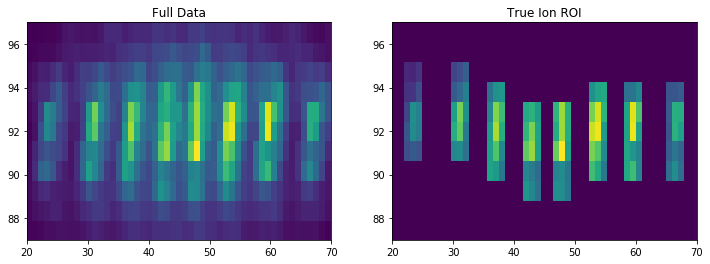

In [5]:
filename='8ions_180V_meta'
Eight(x=[23,31,37,43,48,54,60,67],y=[93,93,92,91,91,92,92,92],file=filename,plot=True)
       
       # x = radial locations ; y=axial locations ; Obtained from "Pandas" 
       
       # plot=True is passed to obtain the 2d histograms (as seen below).

#### Make ion objects

In [6]:
ion_1,ion_2,ion_3,ion_4=Eight.ion_1,Eight.ion_2,Eight.ion_3,Eight.ion_4
ion_5,ion_6,ion_7,ion_8=Eight.ion_5,Eight.ion_6,Eight.ion_7,Eight.ion_8

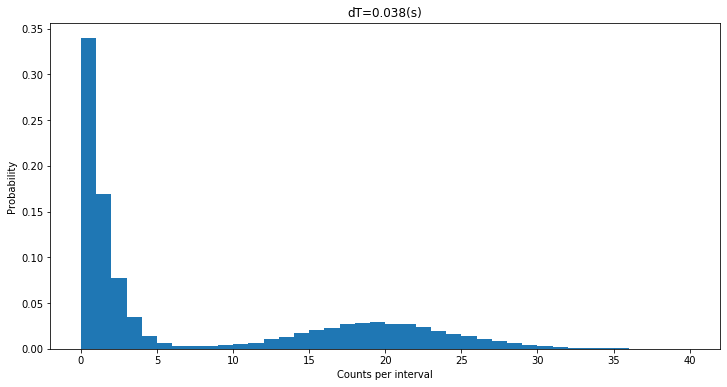

Ion 1 
Guess: 1 , 19
Intersection: 6 photons
 mean counts in bright state = 19.579098986473902 
 mean counts in dark state = 0.47703077968769764


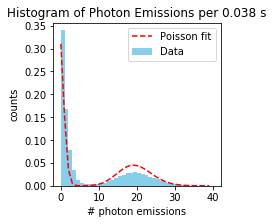

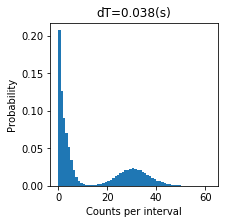

Ion 2 
Guess: 1 , 19
Intersection: 9 photons
 mean counts in bright state = 30.622836474323524 
 mean counts in dark state = 0.9755906090369083


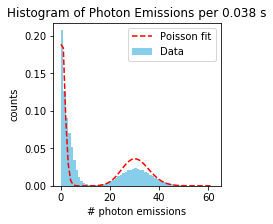

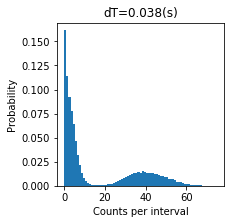

Ion 3 
Guess: 1 , 19
Intersection: 12 photons
 mean counts in bright state = 40.64890456565016 
 mean counts in dark state = 1.441995560092963


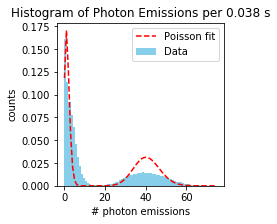

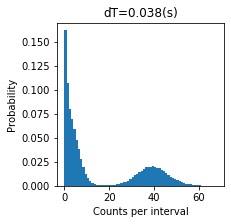

Ion 4 
Guess: 1 , 19
Intersection: 12 photons
 mean counts in bright state = 39.37055478225021 
 mean counts in dark state = 1.3526054015784825


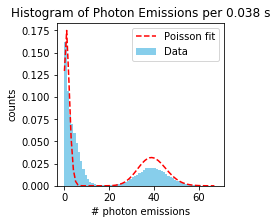

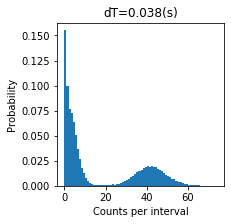

Ion 5 
Guess: 1 , 19
Intersection: 13 photons
 mean counts in bright state = 41.96436188451919 
 mean counts in dark state = 1.501528186670862


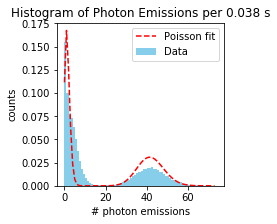

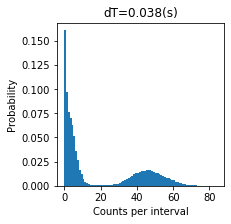

Ion 6 
Guess: 1 , 19
Intersection: 13 photons
 mean counts in bright state = 46.29800435120273 
 mean counts in dark state = 1.4159383857994021


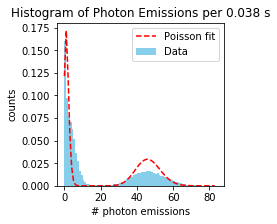

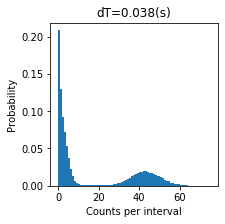

Ion 7 
Guess: 1 , 19
Intersection: 12 photons
 mean counts in bright state = 43.10609764463322 
 mean counts in dark state = 0.9795556087967786


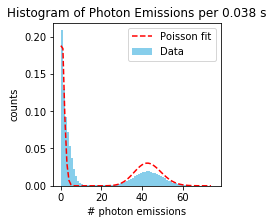

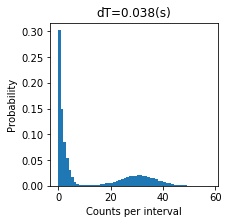

Ion 8 
Guess: 1 , 19
Intersection: 8 photons
 mean counts in bright state = 30.936209154508536 
 mean counts in dark state = 0.5660875805204528


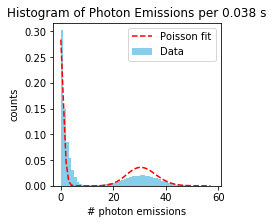

[6, 9, 12, 12, 13, 13, 12, 8]

In [8]:
dT_list=[3.8e7] # integration times
ions=[ion_1,ion_2,ion_3,ion_4,ion_5,ion_6,ion_7,ion_8]
k_poiss=[]
for time in range (len(dT_list)):    #try fits for different integration times
    dT=dT_list[time]
    plt.figure(figsize=(12,6))
    for i in ions:
        res,guess_1,guess_2=i.GetCountsForEvents(dT)  # gives #photons per dT graph (seen below)
        k=i.FittingPoisson_double(res, 1, 19,dT) # res is counts; also pass mu of each Poisson (ballparked)
                                                 # gives double-Poisson fit 
        k_poiss.append(k)                   
k_poiss #intersection point for each ion

In [9]:
# {ion object: (k lower limit, k upper limit, point of intersection) 
ranges={ion_1:(4,12,6),ion_2:(9,18,9),ion_3:(9,20,12),ion_4:(9,22,12),
        ion_5:(9,22,13),ion_6:(10,22,13),ion_7:(8,20,12),ion_8:(7,16,8)}  # eye-estimated k ranges for each ion

K_lower:4	 k_upper:12	 Intersection:6

Ion_1
Poisson Intersection:6
At k=4:
Transitions 5124 Rate: 1.686495258932575
At k=5:
Transitions 3888 Rate: 1.2796825852322116
At k=6:
Transitions 3430 Rate: 1.1289380831652482
At k=7:
Transitions 3362 Rate: 1.1065568033823805
At k=8:
Transitions 3338 Rate: 1.0986575281648976
At k=9:
Transitions 3424 Rate: 1.1269632643608776
At k=10:
Transitions 3682 Rate: 1.2118804729488175
At k=11:
Transitions 4024 Rate: 1.3244451447979473

Optimal Transition:
Ion_1
Poisson Intersection:6
At k=7:
Transitions 3362 Rate: 1.1065568033823805


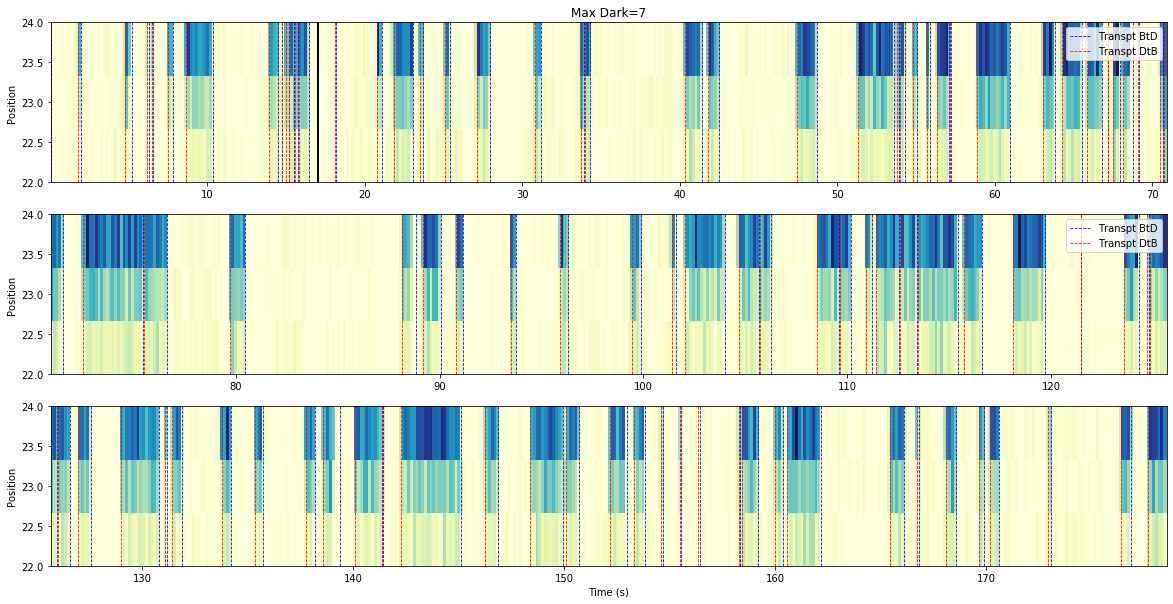

In [10]:
n=1 # ion number
values=list(ranges.values())[n-1] # upper and lower bounds of k from "ranges"
print (f"K_lower:{values[0]}\t k_upper:{values[1]}\t Intersection:{values[2]}\n")

rates_1,errors_1=ion_1.State(dT,values[0],values[1],values[2])
print ("\nOptimal Transition:")
rate_1,error_1,k_1=ion_1.min_error_k(errors_1,rates_1,plot=True)

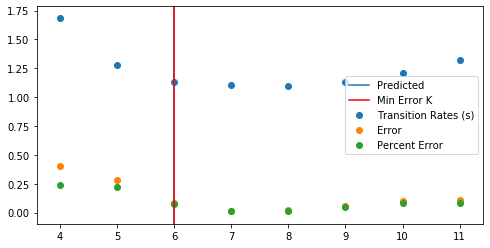

In [11]:
plt.figure(figsize=(8,4))
k__=np.arange(4,12)
plt.scatter(k__,rates_1,label="Transition Rates (s)")
plt.scatter(k__,errors_1,label="Error")
plt.scatter(k__,errors_1/rates_1,label="Percent Error")
plt.axvline(k_poiss[0],label="Predicted")
plt.axvline(6,c="r",label="Min Error K")
plt.legend();

In [12]:
ion_1.data.head()

,index,y,x,time,center flux,cluster size,dt,state
0,0,95,24,4.537454e+07,1175,5,1.332088e+06,0
1,1,91,22,1.452976e+08,750,5,9.992311e+07,0
2,2,92,23,5.485230e+08,1525,7,4.032254e+08,0
3,3,91,22,8.355790e+08,1425,6,2.870560e+08,0
4,4,92,24,9.089291e+08,2000,8,7.335008e+07,0


In [13]:
ion_1.data.groupby("state").describe()["center flux"]

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
0,48090.0,1385.975775,606.099189,25.0,950.0,1350.0,1775.0,7625.0
1,539355.0,1387.546097,591.571859,25.0,950.0,1350.0,1775.0,8900.0


9 18 9
Ion_2
Poisson Intersection:9
At k=9:
Transitions 2840 Rate: 0.9347473648502074
At k=10:
Transitions 2435 Rate: 0.8014471244402306
At k=11:
Transitions 2202 Rate: 0.7247583441549847
At k=12:
Transitions 2096 Rate: 0.689869886171139
At k=13:
Transitions 2087 Rate: 0.6869076586064728
At k=14:
Transitions 2107 Rate: 0.6934903865279531
At k=15:
Transitions 2143 Rate: 0.7053392967866178
At k=16:
Transitions 2212 Rate: 0.7280497081157249
At k=17:
Transitions 2341 Rate: 0.7705083032092731
Ion_2
Poisson Intersection:9
At k=13:
Transitions 2087 Rate: 0.6869076586064728


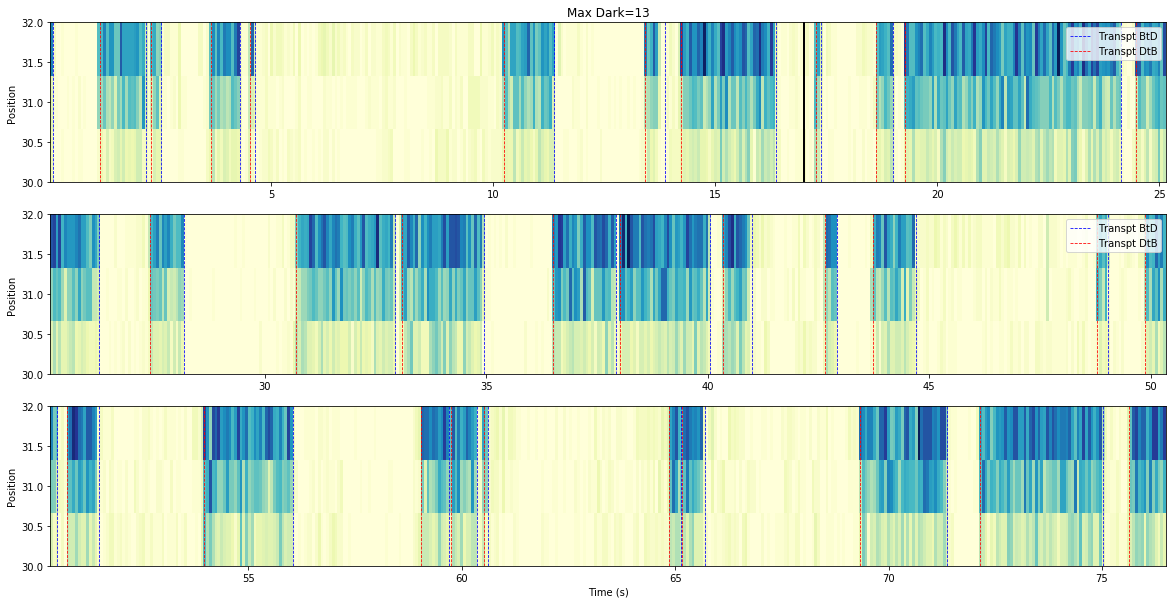

In [15]:
n=2
values=list(ranges.values())[n-1]
print (values[0],values[1],values[2])
rates_2,errors_2=ion_2.State(dT,values[0],values[1],values[2])
rate_2,error_2,k_2=ion_2.min_error_k(errors_2,rates_2,plot=True)

Ion_3
Poisson Intersection:12
At k=9:
Transitions 4066 Rate: 1.3382630448159794
At k=10:
Transitions 3228 Rate: 1.0624478870304923
At k=11:
Transitions 2650 Rate: 0.8722078378658007
At k=12:
Transitions 2338 Rate: 0.769517707520846
At k=13:
Transitions 2130 Rate: 0.7010576206242096
At k=14:
Transitions 2052 Rate: 0.6753850880379709
At k=15:
Transitions 2018 Rate: 0.6641944969106361
At k=16:
Transitions 2000 Rate: 0.6582700663138118
At k=17:
Transitions 1994 Rate: 0.6562952561148704
At k=18:
Transitions 2024 Rate: 0.6661693071095776
At k=19:
Transitions 2048 Rate: 0.6740685479053433
Ion_3
Poisson Intersection:12
At k=16:
Transitions 2000 Rate: 0.6582700663138118


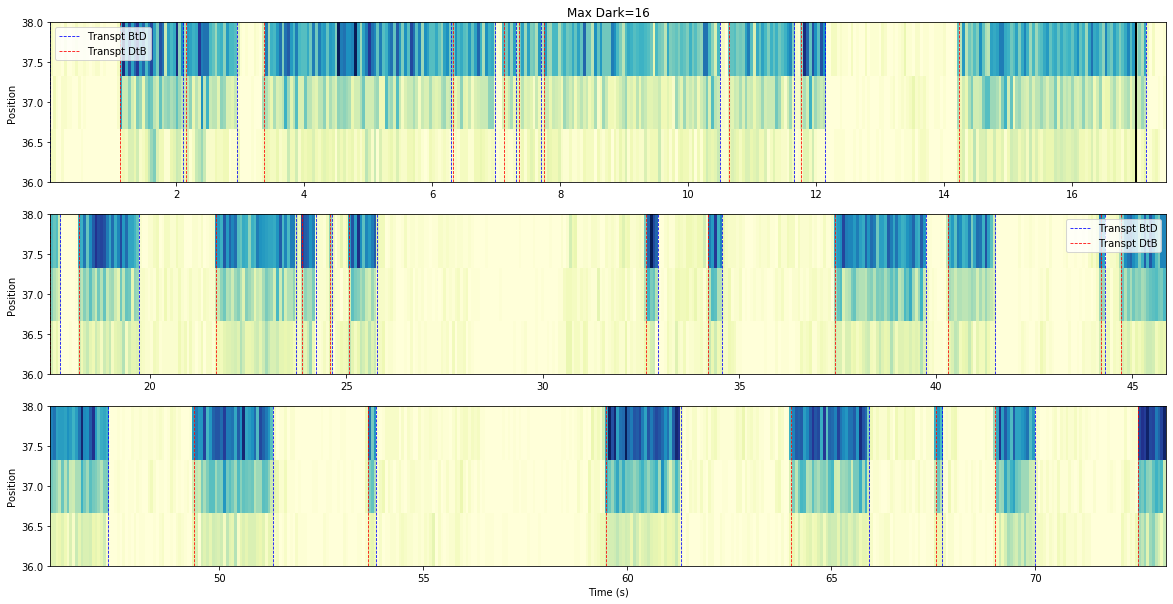

In [16]:
n=3
values=list(ranges.values())[n-1]
rates_3,errors_3=ion_3.State(dT,values[0],values[1],values[2])
rate_3,error_3,k_3=ion_3.min_error_k(errors_3,rates_3,plot=True)

Ion_4
Poisson Intersection:12
At k=9:
Transitions 5289 Rate: 1.7407751565430398
At k=10:
Transitions 4105 Rate: 1.3510837620739606
At k=11:
Transitions 3263 Rate: 1.0739552535072676
At k=12:
Transitions 2751 Rate: 0.9054400558990172
At k=13:
Transitions 2385 Rate: 0.7849780201087445
At k=14:
Transitions 2241 Rate: 0.7375831207814241
At k=15:
Transitions 2173 Rate: 0.7152021960990783
At k=16:
Transitions 2107 Rate: 0.6934795339073898
At k=17:
Transitions 2113 Rate: 0.6954543213793615
At k=18:
Transitions 2107 Rate: 0.6934795339073898
At k=19:
Transitions 2109 Rate: 0.6941377963980471
At k=20:
Transitions 2139 Rate: 0.7040117337579055
At k=21:
Transitions 2161 Rate: 0.711252621155135
Ion_4
Poisson Intersection:12
At k=18:
Transitions 2107 Rate: 0.6934795339073898


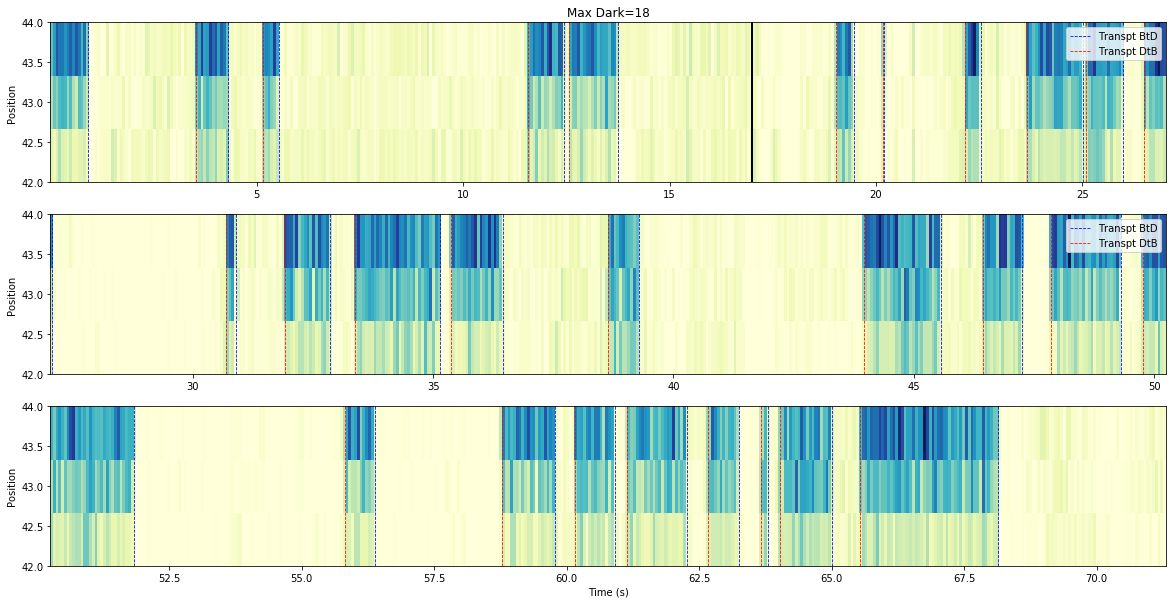

In [17]:
n=4
values=list(ranges.values())[n-1]
rates_4,errors_4=ion_4.State(dT,values[0],values[1],values[2])
rate_4,error_4,k_4=ion_4.min_error_k(errors_4,rates_4,plot=True)

Ion_5
Poisson Intersection:13
At k=9:
Transitions 5126 Rate: 1.6871321264972285
At k=10:
Transitions 4110 Rate: 1.3527337182800643
At k=11:
Transitions 3222 Rate: 1.0604642433815978
At k=12:
Transitions 2726 Rate: 0.8972146267716435
At k=13:
Transitions 2412 Rate: 0.7938670872242128
At k=14:
Transitions 2178 Rate: 0.7168501310009683
At k=15:
Transitions 2148 Rate: 0.7069761622543985
At k=16:
Transitions 2086 Rate: 0.6865699601781542
At k=17:
Transitions 2078 Rate: 0.6839369018457356
At k=18:
Transitions 2068 Rate: 0.6806455789302124
At k=19:
Transitions 2072 Rate: 0.6819621080964217
At k=20:
Transitions 2074 Rate: 0.6826203726795264
At k=21:
Transitions 2092 Rate: 0.6885447539274682
Ion_5
Poisson Intersection:13
At k=19:
Transitions 2072 Rate: 0.6819621080964217


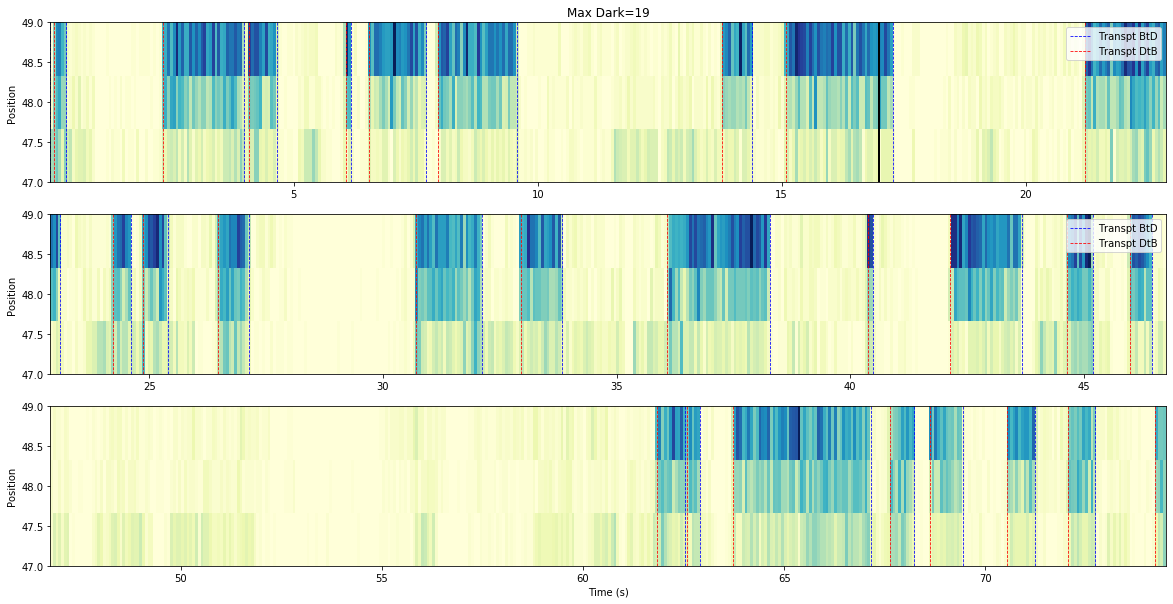

In [18]:
n=5
values=list(ranges.values())[n-1]
rates_5,errors_5=ion_5.State(dT,values[0],values[1],values[2])
rate_5,error_5,k_5=ion_5.min_error_k(errors_5,rates_5,plot=True)

Ion_6
Poisson Intersection:13
At k=10:
Transitions 3876 Rate: 1.2757422327750063
At k=11:
Transitions 3092 Rate: 1.0176973642260887
At k=12:
Transitions 2646 Rate: 0.8709014313525971
At k=13:
Transitions 2354 Rate: 0.7747928833726432
At k=14:
Transitions 2210 Rate: 0.7273968871085562
At k=15:
Transitions 2112 Rate: 0.6951412785399415
At k=16:
Transitions 2060 Rate: 0.678026057666799
At k=17:
Transitions 2056 Rate: 0.6767095022150188
At k=18:
Transitions 2042 Rate: 0.6721015581337881
At k=19:
Transitions 2044 Rate: 0.6727598358596782
At k=20:
Transitions 2042 Rate: 0.6721015581337881
At k=21:
Transitions 2054 Rate: 0.6760512244891287
Ion_6
Poisson Intersection:13
At k=19:
Transitions 2044 Rate: 0.6727598358596782


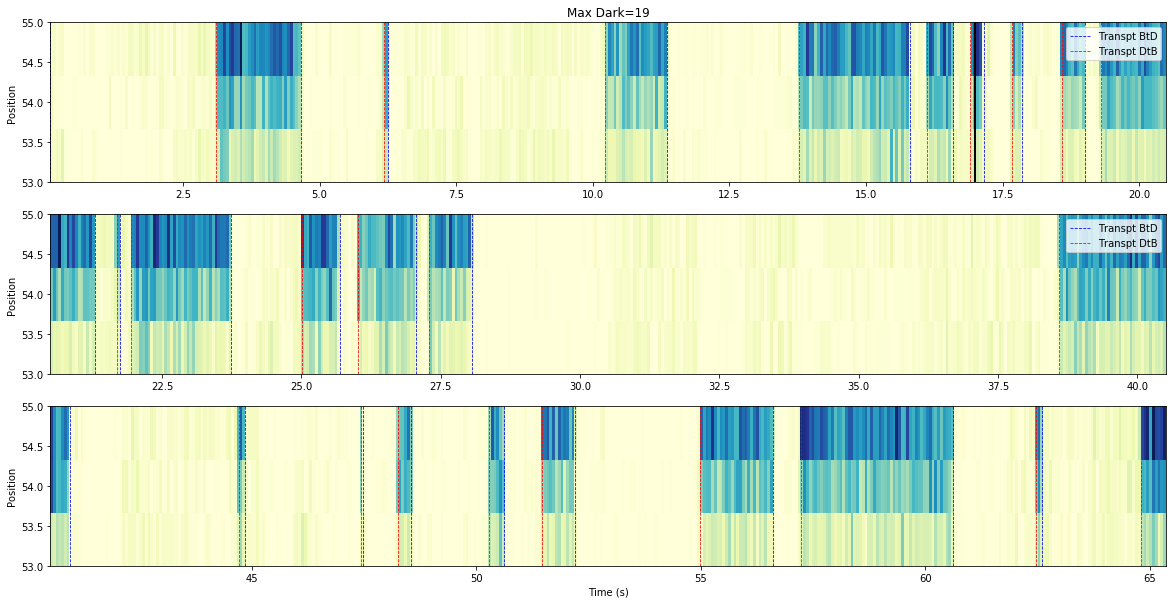

In [19]:
n=6
values=list(ranges.values())[n-1]
rates_6,errors_6=ion_6.State(dT,values[0],values[1],values[2])
rate_6,error_6,k_6=ion_6.min_error_k(errors_6,rates_6,plot=True)

8 20 12
Ion_7
Poisson Intersection:12
At k=8:
Transitions 3404 Rate: 1.1204052673488194
At k=9:
Transitions 2538 Rate: 0.8353667945156592
At k=10:
Transitions 2092 Rate: 0.688568689569251
At k=11:
Transitions 1886 Rate: 0.6207650805581297
At k=12:
Transitions 1812 Rate: 0.5964084443114163
At k=13:
Transitions 1774 Rate: 0.5839009824549958
At k=14:
Transitions 1764 Rate: 0.5806095451243588
At k=15:
Transitions 1766 Rate: 0.5812678325904862
At k=16:
Transitions 1756 Rate: 0.5779763952598493
At k=17:
Transitions 1762 Rate: 0.5799512576582314
At k=18:
Transitions 1762 Rate: 0.5799512576582314
At k=19:
Transitions 1762 Rate: 0.5799512576582314
Ion_7
Poisson Intersection:12
At k=18:
Transitions 1762 Rate: 0.5799512576582314


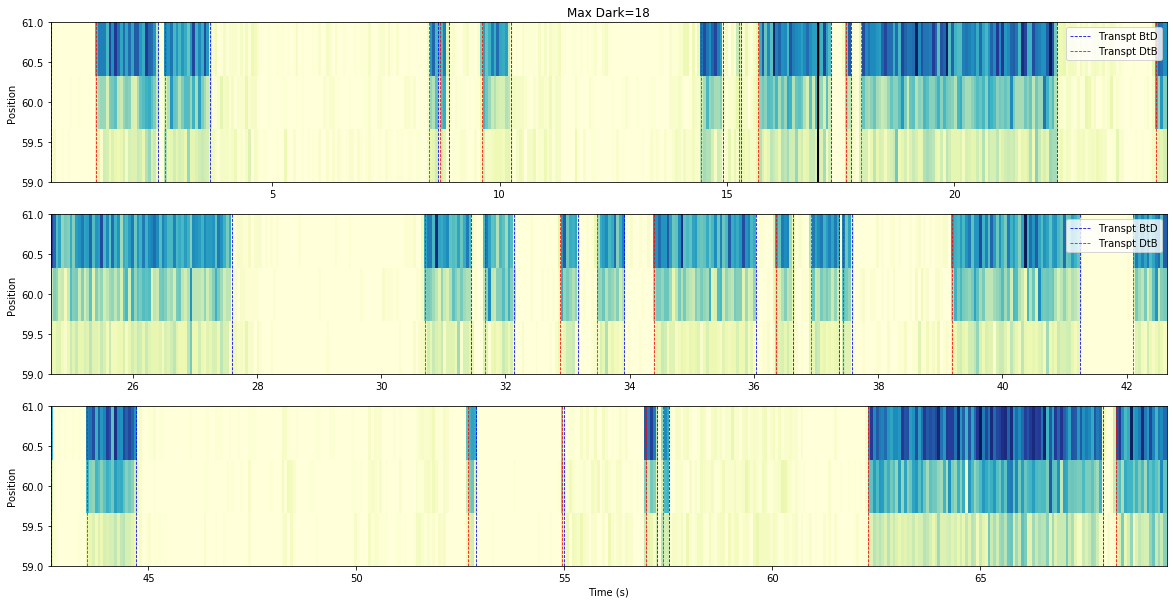

In [21]:
n=7
values=list(ranges.values())[n-1]
print (values[0],values[1],values[2])
rates_7,errors_7=ion_7.State(dT,values[0],values[1],values[2])
rate_7,error_7,k_3=ion_7.min_error_k(errors_7,rates_7,plot=True)

Ion_8
Poisson Intersection:8
At k=7:
Transitions 2751 Rate: 0.905485985414522
At k=8:
Transitions 2365 Rate: 0.7784348802273153
At k=9:
Transitions 2237 Rate: 0.7363039437921794
At k=10:
Transitions 2191 Rate: 0.7211631385108025
At k=11:
Transitions 2193 Rate: 0.7218214343926015
At k=12:
Transitions 2219 Rate: 0.7303792808559885
At k=13:
Transitions 2257 Rate: 0.7428869026101694
At k=14:
Transitions 2353 Rate: 0.7744851049365213
At k=15:
Transitions 2417 Rate: 0.7955505731540893
Ion_8
Poisson Intersection:8
At k=11:
Transitions 2193 Rate: 0.7218214343926015


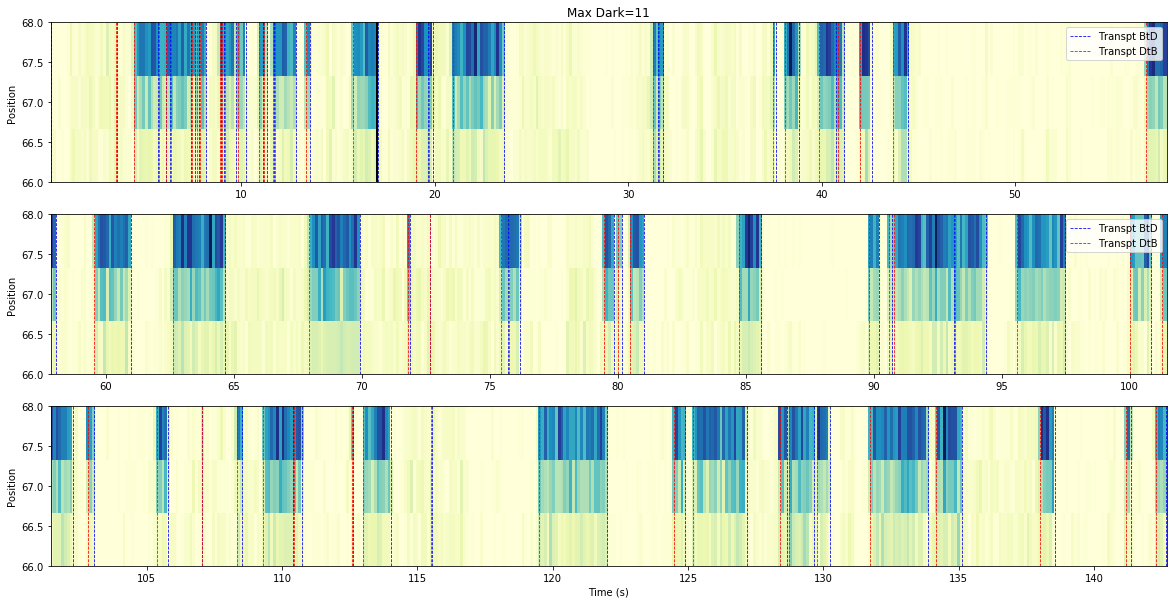

In [22]:
n=8
values=list(ranges.values())[n-1]
rates_8,errors_8=ion_8.State(dT,values[0],values[1],values[2])
rate_8,error_8,k_3=ion_8.min_error_k(errors_8,rates_8,plot=True)

Text(0, 0.5, 'Transition rate (s)')

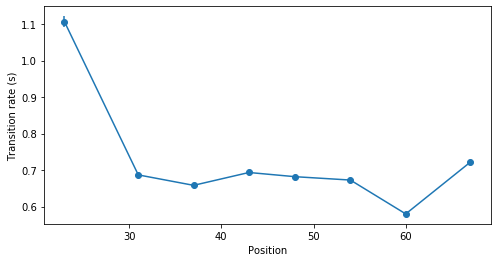

In [23]:
plt.figure(figsize=(8,4))
positions=np.array([ion_1.x,ion_2.x,ion_3.x,ion_4.x,ion_5.x,ion_6.x,ion_7.x,ion_8.x])
rates=np.array(
    [rate_1,rate_2,rate_3,rate_4,rate_5,rate_6,rate_7,rate_8]
                )
errorbars=np.array(
    [error_1,error_2,error_3,error_4,error_5,error_6,error_7,error_8]
    )

plt.errorbar(positions,rates,yerr=errorbars,fmt="-o")
plt.xlabel("Position")
plt.ylabel("Transition rate (s)")

In [ ]:
plt.figure(figsize=(8,4))
rates=[rate_1,rate_2,rate_3,rate_4,rate_5,rate_6,rate_7,rate_8]
pos=[ion_1.x,ion_2.x,ion_3.x,ion_4.x,ion_5.x,ion_6.x,ion_7.x,ion_8.x]
errors=[error_1,error_2,error_3,error_4,error_5,error_6,error_7,error_8]

plt.errorbar(pos,rates,yerr=errors,fmt="-o")
plt.xlabel("Radial Position");plt.ylabel("Transition Rate (s)")

# Telegraph Ion_1 vs Ion_6 

In [103]:
slices=max(data["time"])//3
data.query(f'time <{2*slices}')

,index,y,x,time,center flux,cluster size,dt,state
0,0,90,66,1.364157e+08,1400,4,9.102828e+07,0
1,1,91,66,2.076967e+08,1775,7,7.128101e+07,0
2,2,93,67,2.457129e+08,1750,5,3.801623e+07,0
3,3,90,66,3.340517e+08,1100,14,8.833873e+07,0
4,4,93,66,3.396559e+08,675,4,5.604239e+06,0
...,...,...,...,...,...,...,...,...
604585,604585,90,68,2.025299e+12,1275,5,5.368375e+07,0
604586,604586,94,66,2.025322e+12,1025,5,2.373804e+07,0
604587,604587,91,67,2.025443e+12,975,3,1.206192e+08,0
604588,604588,93,67,2.025462e+12,1575,7,1.886549e+07,0


In [111]:
def telegrapher(ion_obj,start,end): # plots telegraph between given time interval (note: time in dataframe is in ns)
                                    # "ion_obj" is an object i.e. ion_1, ion_2 etc. 
    fig,(ax,ax1,ax2)=plt.subplots(3,1,figsize=(20,5))
    ymin,ymax=ion_obj.x-ion_obj.r0,ion_obj.x+ion_obj.r0 
    ax.set_title(f"Max Dark={ion_obj.k}") 
    data=ion_obj.data.query(f' {start}<=time<={end}')
    
    slices=max(data["time"])//3                        #divide time equally among the three axes
    slice_1=data.query(f'time <{slices}')
    slice_2=data.query(f'{slices}< time <{2*slices}')
    slice_3=data.query(f'{2*slices}<time <{3*slices}')                                  
    
    ax.hist2d(slice_1["time"]*1e-9,slice_1["x"],
              bins=(400,3),cmap="YlGnBu") #plots in seconds 
    ax.vlines(ion_obj.hline_BtD,ymin,ymax,color="b",lw=0.8,ls="--",label="Transpt BtD")
    ax.vlines(ion_obj.hline_DtB,ymin,ymax,color="r",lw=0.8,ls="--",label="Transpt DtB")
    ax.set_ylabel("Position")
    ax.legend()

    #plotting the first 5000 events 
                   #ROI of ion     

    ax1.hist2d(slice_2["time"]*1e-9,slice_2["x"],
              bins=(400,3),cmap="YlGnBu") #plots in seconds 
    ax1.vlines(ion_obj.hline_BtD,ymin,ymax,color="b",lw=0.8,ls="--",label="Transpt BtD")
    ax1.vlines(ion_obj.hline_DtB,ymin,ymax,color="r",lw=0.8,ls="--",label="Transpt DtB")
    ax1.set_ylabel("Position")
    ax1.legend()

    ax2.hist2d(slice_2["time"]*1e-9,slice_2["x"],
              bins=(400,3),cmap="YlGnBu")
    ax2.vlines(ion_obj.hline_BtD,ymin,ymax,color="b",lw=0.8,ls="--",label="Transpt BtD")
    ax2.vlines(ion_obj.hline_DtB,ymin,ymax,color="r",lw=0.8,ls="--",label="Transpt DtB")
    ax2.set_ylabel("Position")
    ax2.legend()

    plt.show()

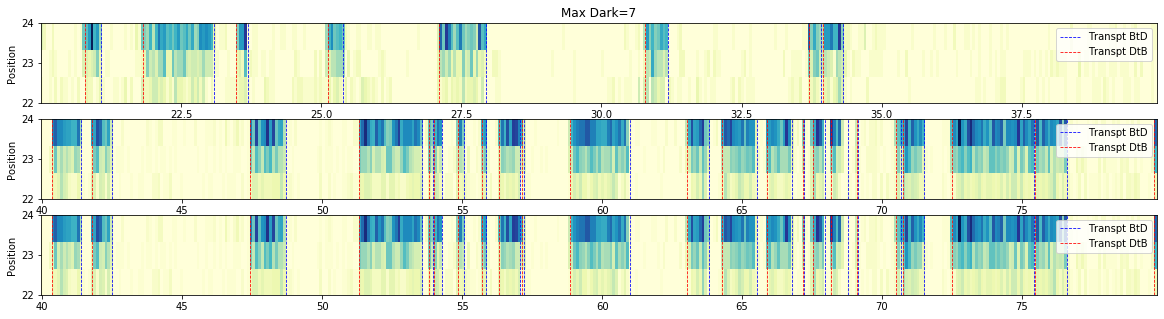

In [112]:
telegrapher(ion_1,20e9,120e9)

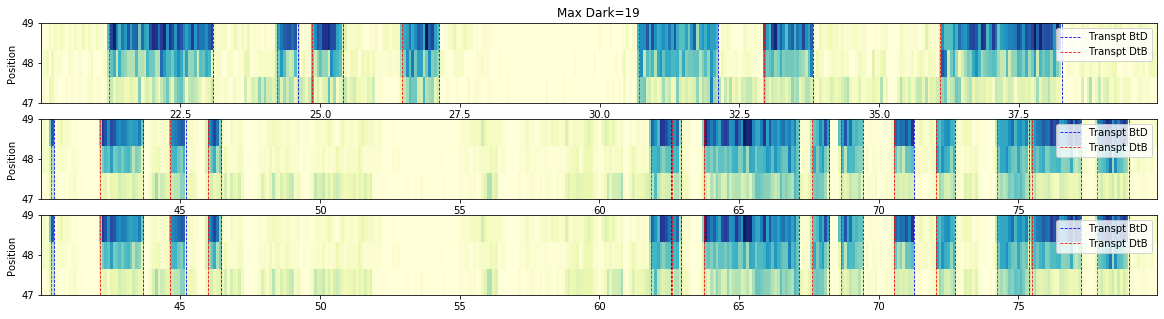

In [113]:
telegrapher(ion_5,20e9,120e9)

### 30 ms results (cross data) record ; DO NOT TOUCH

In [3]:
### 8 ions

rates_180=np.array([1.1532941817524869, 0.7323284812646871, 0.6865756791653057, 0.7125691461364494, 
           0.7023683101726659, 0.678026057666799, 0.585875844853378, 0.7501281573099584])
pos_180=[23, 31, 37, 43, 48, 54, 60, 67]
errors_180=np.array([0.0717517498921354, 0.02386238871536628, 0.02386238871536628, 0.007899149887886758, 
            0.001974793749313919, 0.00658277725890094, 0.0013165749322547882, 0.012178473813281465])

rates_130=np.array([1.0809571020913045, 0.7829716029315779, 0.8355874544066693, 0.900558874384595, 
           0.9257745385893574, 0.7440171602370894, 0.7168849996044476, 1.2016104289699443])
errors_130= np.array([0.03262335661903759, 0.002467347488229743, 0.002467347488229743, 0.0009594995617491775, 
          0.0016448466779793725, 0.001096561768956672, 0.002467290629613761, 0.019190675342892205])
pos_130=[20, 28, 35, 42, 49, 56, 63, 71]

### 6 ions

rates_6_180=np.array([0.8237979,0.68284444,0.72393123,0.65942844,0.61546777,0.78638945])
pos_6_180=[28.0, 36.0, 43.0, 49.0, 56.0, 64.0]
errors_6_180=np.array([0.00698482,0.00780628,0.00821715, 0.00986061, 0.01889954, 0.02136481])

### 4 ions

rates__4=np.array([0.7501620761139325, 0.9453814553052108, 0.9645242189300046, 0.8249276752216871] )
pos__4=[34, 42, 49, 56]
errors__4=np.array([0.0005507797915668133, 0.0046814694844709015, 0.0046814694844709015, 0.0016520580945694752])

### 3 ions

rates_3_130=np.array([0.85576675, 0.95559418, 0.81355648] )
pos_3_130=[35., 46., 57.]
errors_3_130=np.array([0.00493712, 0.00219425, 0.00274294])

### 2 ions
# > 180 V

rates_2_180=np.array([0.8586162292237983, 0.9801491297153648])
pos_2_180=[40, 51]
errors_2_180=np.array([0.00030468993230081676, 0.002589763009816781] )

# > 350 V
rates_2_350=np.array([0.8367139258015215, 0.8362220254192908]  )
pos_2_350=[40,50]
errors_2_350=np.array([0.0043921990855723125, 0.008784998297247992] )

# 1 ion 180 V 
rates_1=[0.6488079031570708 ]
pos_1=[45]
errors_1=[0.04116801415971261]

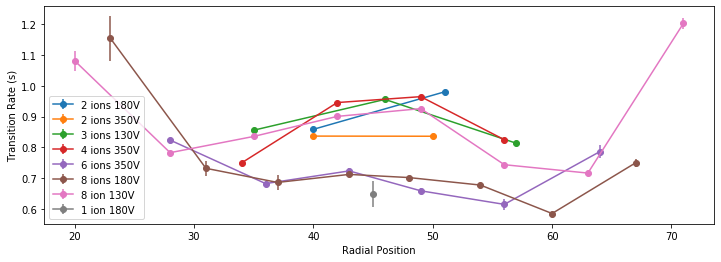

In [4]:
plt.figure(figsize=(12,4))
plt.errorbar(pos_2_180,rates_2_180,yerr=np.array(errors_2_180),fmt="-o",label="2 ions 180V")
plt.errorbar(pos_2_350,rates_2_350,yerr=np.array(errors_2_350),fmt="-o",label="2 ions 350V")
plt.errorbar(pos_3_130,rates_3_130,yerr=np.array(errors_3_130),fmt="-o",label="3 ions 130V")
plt.errorbar(pos__4,rates__4,yerr=np.array(errors__4),fmt="-o",label="4 ions 350V")
plt.errorbar(pos_6_180,rates_6_180,yerr=np.array(errors_6_180),fmt="-o",label="6 ions 350V")
plt.errorbar(pos_180,rates_180,yerr=errors_180,fmt="-o",label="8 ions 180V")
plt.errorbar(pos_130,rates_130,yerr=errors_130,fmt="-o",label="8 ion 130V")
plt.errorbar(pos_1,rates_1,errors_1,fmt="-o",label="1 ion 180V")
plt.xlabel("Radial Position");plt.ylabel("Transition Rate (s)");plt.legend();

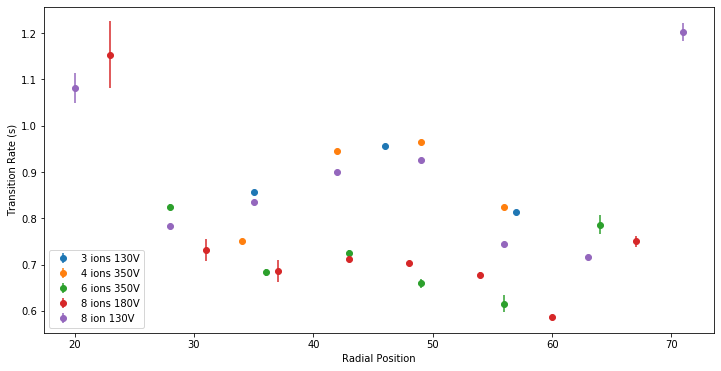

In [7]:
plt.figure(figsize=(12,6))
plt.errorbar(pos_3_130,rates_3_130,yerr=np.array(errors_3_130),fmt="o",label="3 ions 130V")
plt.errorbar(pos__4,rates__4,yerr=np.array(errors__4),fmt="o",label="4 ions 350V")
plt.errorbar(pos_6_180,rates_6_180,yerr=np.array(errors_6_180),fmt="o",label="6 ions 350V")
plt.errorbar(pos_180,rates_180,yerr=errors_180,fmt="o",label="8 ions 180V")
plt.errorbar(pos_130,rates_130,yerr=errors_130,fmt="o",label="8 ion 130V")
plt.xlabel("Radial Position");plt.ylabel("Transition Rate (s)");plt.legend();

In [ ]:
rates_2_180=np.array([0.8586162292237983, 0.9801491297153648])
pos_2_180=[40, 51]
errors_2_180=np.array([0.00030468993230081676, 0.002589763009816781] )

# > 350 V
rates_2_350=np.array([0.8367139258015215, 0.8362220254192908]  )
pos_2_350=[40,50]
errors_2_350=np.array([0.0043921990855723125, 0.008784998297247992] )


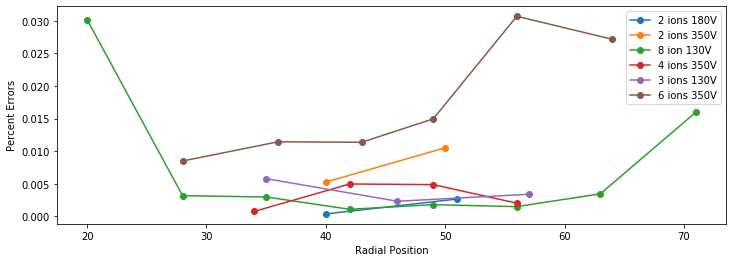

In [8]:
plt.figure(figsize=(12,4))
plt.errorbar(pos_2_180,errors_2_180/rates_2_180,fmt="-o",label="2 ions 180V")
plt.errorbar(pos_2_350,errors_2_350/rates_2_350,fmt="-o",label="2 ions 350V")
plt.errorbar(pos_130,errors_130/rates_130,fmt="-o",label="8 ion 130V")
plt.errorbar(pos__4,np.array(errors__4)/rates__4,fmt="-o",label="4 ions 350V")
plt.errorbar(pos_3_130,np.array(errors_3_130)/rates_3_130,fmt="-o",label="3 ions 130V")
plt.errorbar(pos_6_180,np.array(errors_6_180)/rates_6_180,fmt="-o",label="6 ions 350V")
plt.xlabel("Radial Position");plt.ylabel("Percent Errors");plt.legend();

In [ ]:
plt.figure(figsize=(12,6))
plt.errorbar(pos_180,errors_180,fmt="-o",label="8 ions 180V")
plt.errorbar(pos_130,errors_130,fmt="-o",label="8 ion 130V")
plt.errorbar(pos__4,np.array(errors__4),fmt="-o",label="4 ions 350V")
plt.errorbar(pos_3_130,np.array(errors_3_130),fmt="-o",label="3 ions 130V")
plt.errorbar(pos_6_180,np.array(errors_6_180),fmt="-o",label="6 ions 350V")
plt.xlabel("Radial Position");plt.ylabel("Errors (s)");plt.legend();

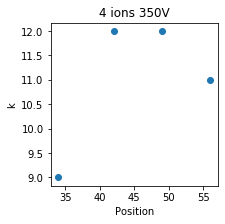

In [ ]:
ion_1.